In [32]:
from glob import glob
import cv2
from utils.probeImage import probeImage
import pandas as pd

from skimage.morphology import label

In [40]:
img_paths = glob("../maskss/*.png")
img_paths.sort()
#probeImage(gray)

#check the masks
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
_ = plt.hist(gray[:,:,0].flatten(), normed=True, bins=30)

In [45]:
img_paths.index('../maskss/697a05c6fe4a07c601d46da80885645ad574ea19b47ee795ccff216c9f1f1808.png')

35

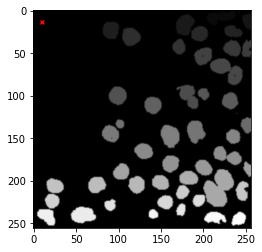

In [46]:
i = 35
img_path = img_paths[i]
gray = cv2.imread(img_path)
gray = (gray<255)*1
mask = gray[:,:,0]
img_name = img_path.split("/")[-1]
lab_img = label(mask > 0)
probeImage(lab_img)

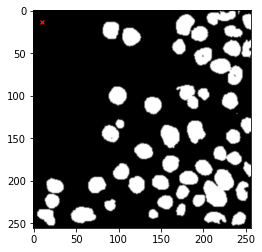

In [47]:
probeImage(gray*1.0)

In [48]:
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def label_to_rles(lab_img):
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)
        
def mask2RLE(lab_img,img_name):
    rle = list(label_to_rles(lab_img))
    new_test_id = [img_name[:-4]] * len(rle)
    return (rle,new_test_id)       

In [30]:
def encode1mask(img_path):
    gray = cv2.imread(img_path)
    gray = (gray<255)*1
    mask = gray[:,:,0]
    img_name = img_path.split("/")[-1]
    lab_img = label(mask > 0)
    rle,new_test_id  = mask2RLE(lab_img,img_name)
    return rle,new_test_id

In [33]:
rles = []
new_test_ids = []
for img_path in img_paths:
    rle, new_test_id = encode1mask(img_path)
    rles.extend(rle)
    new_test_ids.extend(new_test_id)

In [34]:
def makesub(rles, new_test_ids,file_path):
    sub = pd.DataFrame()
    sub['ImageId'] = new_test_ids
    sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
    sub.to_csv(file_path, index=False)
    print(sub.shape)
    print("submission file generated in ",file_path)
    

file_path = '../submission/fasternn-linknet.csv'

makesub(rles, new_test_ids,file_path)

(2389, 2)
submission file generated in  ../submission/fasternn-linknet.csv


In [35]:
2650-2389

261